In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('covid-data.xlsx', engine="openpyxl")
df = df[df.countriesAndTerritories == 'Iran']
df = df.reset_index()

In [7]:
df.drop(['countriesAndTerritories', 'geoId', 'countryterritoryCode', 'popData2019', 'continentExp', 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'], axis=1, inplace=True)
df

,dateRep,day,month,year,cases,deaths,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
24461,2020-11-12,12,11,2020,11780,462,152.471432
24462,2020-11-11,11,11,2020,10339,453,146.494147
24463,2020-11-10,10,11,2020,10463,458,142.428483
24464,2020-11-09,9,11,2020,9236,459,136.997548
24465,2020-11-08,8,11,2020,9450,423,133.325063
...,...,...,...,...,...,...,...
24774,2020-01-04,4,1,2020,0,0,NaN
24775,2020-01-03,3,1,2020,0,0,NaN
24776,2020-01-02,2,1,2020,0,0,NaN
24777,2020-01-01,1,1,2020,0,0,NaN


In [16]:
df.cases.sum()

715068

In [17]:
df.count()

dateRep                                                       318
day                                                           318
month                                                         318
year                                                          318
cases                                                         318
deaths                                                        318
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    305
dtype: int64

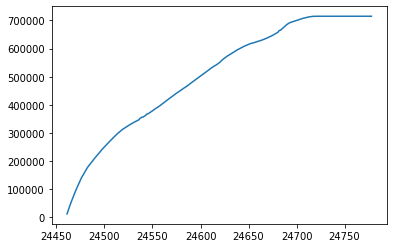

In [20]:
plt.plot(df.cases.cumsum())

In [21]:
df.deaths.mean()

124.72955974842768

In [22]:
df.deaths.median()/24

4.854166666666667

In [23]:
df.describe()

,day,month,year,cases,deaths,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,318.000000,318.000000,318.000000,318.000000,318.000000,305.000000
mean,15.455975,5.742138,2019.996855,2248.641509,124.729560,36.117220
std,8.891367,3.027141,0.056077,2031.042694,108.079109,27.864190
min,1.000000,1.000000,2019.000000,0.000000,0.000000,0.000000
25%,8.000000,3.000000,2020.000000,1011.500000,48.000000,19.162048
50%,15.000000,6.000000,2020.000000,2159.000000,116.500000,37.711412
75%,23.000000,8.000000,2020.000000,2663.250000,183.750000,42.863745
max,31.000000,12.000000,2020.000000,11780.000000,462.000000,152.471432


# Percent change

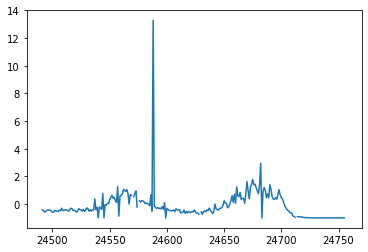

In [25]:
plt.plot(df.deaths.pct_change(periods=30))

In [29]:
df.corr()

,day,month,year,cases,deaths
day,1.000000,-0.049648,-0.098344,-0.025189,0.012806
month,-0.049648,1.000000,-0.116291,0.778013,0.799328
year,-0.098344,-0.116291,1.000000,0.062281,0.064921
cases,-0.025189,0.778013,0.062281,1.000000,0.918798
deaths,0.012806,0.799328,0.064921,0.918798,1.000000


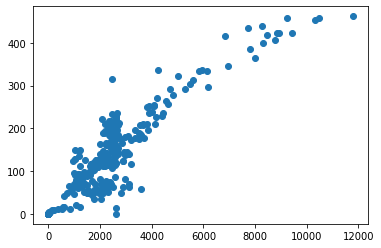

In [30]:
plt.scatter(df.cases, df.deaths)

In [32]:
from persiantools.jdatetime import JalaliDate

In [54]:
df.dateRep.apply(lambda date: JalaliDate.to_jalali(date))

0      1399-08-22
1      1399-08-21
2      1399-08-20
3      1399-08-19
4      1399-08-18
          ...    
313    1398-10-14
314    1398-10-13
315    1398-10-12
316    1398-10-11
317    1398-10-10
Name: dateRep, Length: 318, dtype: object